# Weather Analysis
1)	One might expect that cities that are closest to the equator will be the ones with the highest temperature in general. However, the data set shows that cities between latitude of 20 to 30 actually have the highest temperature. It may be due to seasonality or the date of time when the data is generated, but will have to run the same data for different time of the year in order to conclude that assumption.

2)	There is not much correlation for humidity, cloudiness, and wind speed against latitude. Other analysis will be required to if there is a correlation. For example, instead of generating a random list of cities, we can compare cities near the coastal area against cities further inland. Logically speaking, the correlation for humidity will be shown at that level.


3)	Even though the result for temperature does not show that cities near equator are the highest, it does show that there is less fluctuation in temperature. Cities that is further away from the equator seem to have more fluctuation in temperature.

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import localtime 
import json
import random

# Import API key
# import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

In [126]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size= 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size= 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Create DataFrame with added columns to store data
weather_data = pd.DataFrame({"City":cities})

weather_data["Country"] = ""
weather_data["Temperature (F)"] = 0
weather_data["Country"] = 0
weather_data["Latitude"]= 0
weather_data["Longtitude"] = 0
weather_data["Humidity (%)"] = 0
weather_data["Cloudiness (%)"] = 0
weather_data["Wind Speed (mph)"] = 0


# Print dataframe to check format
weather_data.head()

,City,Country,Temperature (F),Latitude,Longtitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mataura,0,0,0,0,0,0,0
1,port alfred,0,0,0,0,0,0,0
2,taolanaro,0,0,0,0,0,0,0
3,atuona,0,0,0,0,0,0,0
4,kapaa,0,0,0,0,0,0,0


In [127]:
# Test code for 1 city
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="
# cities = weather_data["City"][0]
# base_url = url + cities
# respond = requests.get(base_url).json()
# print(respond["main"]["temp"])
# print(respond["sys"]["country"])
# print(respond["coord"]["lat"])
# print(respond["coord"]["lon"])
# print(respond["main"]["humidity"])
# print(respond["clouds"]["all"])
# print(respond["wind"]["speed"])

## Perform API Calls

In [128]:
# OpenWeatherMap API Key
# api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

count = 0

# For loop to get data base on each city within the random list generated above
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------------")
for index, row in weather_data.iterrows():
    city = row["City"]
    base_url = url + city
    print("---------------------------------------------")
    
    respond = requests.get(base_url).json()
    # Try and except to catch errors and move on
    print(f"Processing City # {index+1} {city}")
    print(base_url)
    try:    
        weather_data.loc[index,"Temperature (F)"] = respond["main"]["temp"]
        weather_data.loc[index,"Country"] = respond["sys"]["country"]
        weather_data.loc[index,"Latitude"]= respond["coord"]["lat"]
        weather_data.loc[index,"Longtitude"] = respond["coord"]["lon"]
        weather_data.loc[index,"Humidity (%)"] = respond["main"]["humidity"]
        weather_data.loc[index,"Cloudiness (%)"] = respond["clouds"]["all"]
        weather_data.loc[index,"Wind Speed (mph)"] = respond["wind"]["speed"]
    except:
        print("---------------------------------------------")
        print(f"No record found for City - " + city)

Begin API Call to OpenWeather Database 
---------------------------------------------
---------------------------------------------
Processing City # 1 mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a45ff562f1e8309db6566e21424cd16&q=mataura
---------------------------------------------
Processing City # 2 port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a45ff562f1e8309db6566e21424cd16&q=port alfred
---------------------------------------------
Processing City # 3 taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a45ff562f1e8309db6566e21424cd16&q=taolanaro
---------------------------------------------
No record found for City - taolanaro
---------------------------------------------
Processing City # 4 atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a45ff562f1e8309db6566e21424cd16&q=atuona
---------------------------------------------
Processing City # 5 kapaa
http://ap

In [129]:
# Create csv file output with data table
weather_data.to_csv("WeatherOutput.csv", index=False)

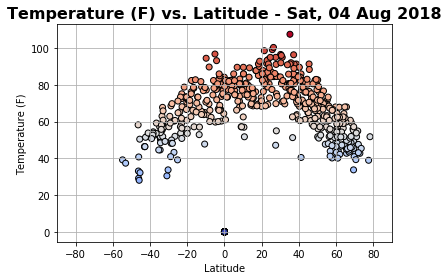

In [130]:
# Build scatterplot for Temperature (F) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Temperature (F)"], c=weather_data["Temperature (F)"], cmap = "coolwarm", edgecolor="black")

plt.title("Temperature (F) vs. Latitude - "+ strftime("%a, %d %b %Y", localtime()), fontsize = 16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)

plt.grid()
plt.savefig("Temperature (F) vs. Latitude.png")
plt.show()

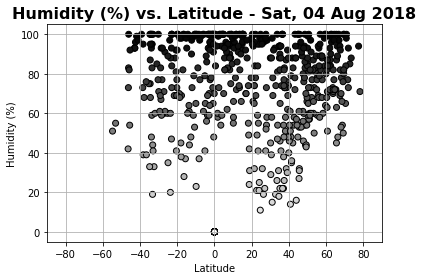

In [131]:
# Build scatterplot for Humidity (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], c=weather_data["Humidity (%)"], cmap = "binary", edgecolor="black")

plt.title("Humidity (%) vs. Latitude - "+ strftime("%a, %d %b %Y", localtime()), fontsize = 16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)

plt.grid()
plt.savefig(" (%) vs. Latitude.png")
plt.show()

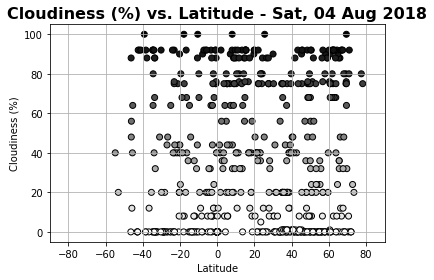

In [132]:
# Build scatterplot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], c = weather_data["Cloudiness (%)"], cmap = "binary", edgecolor="black")

plt.title("Cloudiness (%) vs. Latitude - "+ strftime("%a, %d %b %Y", localtime()), fontsize = 16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90,90)

plt.grid()
plt.savefig("Cloudiness (%) vs. Latitude.png")
plt.show()

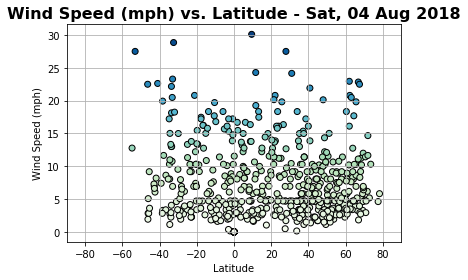

In [133]:
# Build scatterplot for Wind Speed (mph) vs. Latitude

plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], c = weather_data["Wind Speed (mph)"], cmap = "GnBu", edgecolor="black" )

plt.title("Wind Speed (mph) vs. Latitude - " + strftime("%a, %d %b %Y", localtime()), fontsize = 16, fontweight="bold")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)

plt.grid()
plt.savefig("Wind Speed (mph) vs. Latitude.png")
plt.show()